**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ITZEL GUADALUPE RODRIGUEZ VAZQUEZ

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [5]:
happiness = pd.read_csv("/content/happiness_report.csv")
happiness = pd.DataFrame(happiness)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [6]:
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico.index.name=''
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(22    6.595
Name: Score, dtype: float64, 0, 'MEX')

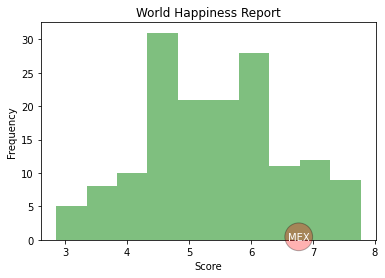

In [34]:
plt.hist(happiness['Score'], color='green',alpha=0.5)
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')
mex_value = happiness.loc[happiness['Country or region']=='Mexico','Score']
plt.annotate("MEX",(mex_value,0),color="w",bbox=dict(facecolor='red',alpha=0.3, boxstyle='circle',))


5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.1, 22    0.861
Name: Healthy life expectancy, dtype: float64, 'MEX')

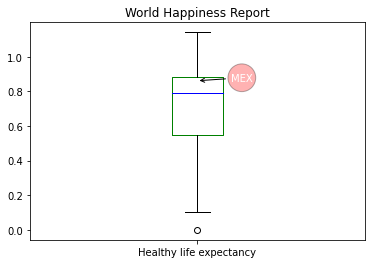

In [8]:
boxprops = dict(linewidth=1, color='green')
medianprops = dict(linewidth=1, color='blue')

plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'],boxprops=boxprops,medianprops=medianprops)
plt.title('World Happiness Report')
mex_value = happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy']
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value),color="w",arrowprops=dict(arrowstyle="->",color='black'),bbox=dict(facecolor='red',alpha=0.3,boxstyle='circle'))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

([<matplotlib.patches.Wedge at 0x7f63f8219a90>,
 [Text(0.7036080672320641, 0.8455386967643523, 'GDP per capita'),
  Text(-1.0495618790668264, 0.32927171456065374, 'Social support'),
  Text(-0.09362648306924604, -1.0960082489051277, 'Healthy life expectancy'),
  Text(0.910527556193128, -0.6172030212279996, 'Freedom to make life choices'),
  Text(1.0821750621015562, -0.1972235659486288, 'Generosity'),
  Text(1.0980326705484382, -0.06575906331651368, 'Perceptions of corruption')],
 [Text(0.38378621849021677, 0.4612029255078285, '27.9%'),
  Text(-0.5724882976728143, 0.1796027533967202, '34.5%'),
  Text(-0.05106899076504329, -0.5978226812209787, '22.5%'),
  Text(0.49665139428716065, -0.3366561933970907, '11.3%'),
  Text(0.5902773066008488, -0.10757649051743388, '1.9%'),
  Text(0.5989269112082389, -0.03586857999082564, '1.9%')])

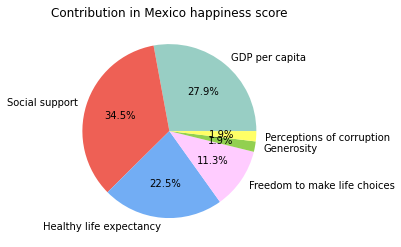

In [9]:
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico.index.name=''
mexico=mexico.T
mexico=mexico.drop(["Overall rank","Score"],axis=0)
mexico2=pd.DataFrame(mexico)
mexico2.rename(columns={'Mexico':'Factors'},inplace=True)
mexico2
nombres = ["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
colores = ["#98CEC4","#EE6055","#72ADF4","#FFCCFF","#92D050","#FFFF66"]
plt.title('Contribution in Mexico happiness score')
plt.pie('Factors',data=mexico2,autopct='%1.1f%%', labels=nombres, colors=colores)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<AxesSubplot:>

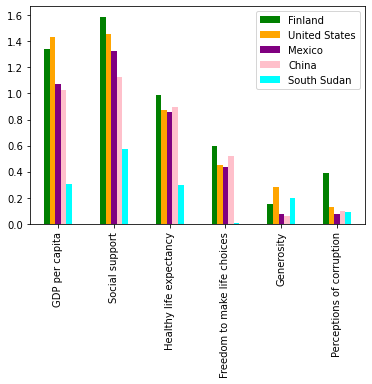

In [12]:
minimo = happiness.groupby('Score')
minimo.min()
happiness2 = happiness.loc[happiness['Country or region'].isin(['Mexico','Finland','South Sudan','China','United States'])]
happiness2
happiness2.set_index('Country or region',inplace=True)
happiness2.index.name=''
happiness2=happiness2.T
happiness2=happiness2.drop(["Overall rank","Score"],axis=0)
happiness2=pd.DataFrame(happiness2)
happiness2
happiness2.plot.bar(xlabel='',color=['green', 'orange', 'purple', 'pink', 'cyan'])

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

ValueError: ignored

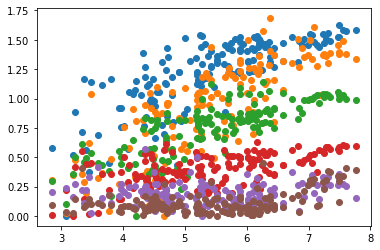

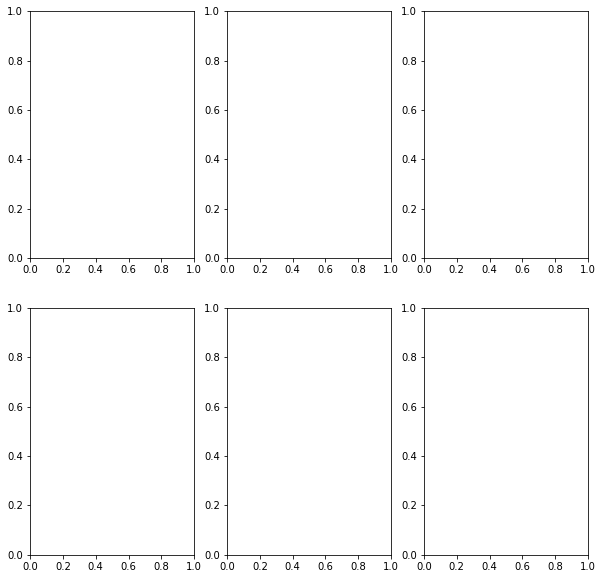

In [26]:

splot1 = plt.scatter(x='Score',y='Social support', data=happiness)
splot2 = plt.scatter(x='Score', y='GDP per capita', data=happiness)
splot3 = plt.scatter(x='Score', y='Healthy life expectancy', data=happiness)
#splot4 = sns.scatterplot(x='Score', y='Freedom to make life choices', data=happiness)
splot4 = plt.scatter(x='Score', y='Freedom to make life choices', data=happiness)
splot5 = plt.scatter(x='Score', y='Generosity', data=happiness)
splot6 = plt.scatter(x='Score', y='Perceptions of corruption', data=happiness)
fig,(splot1, splot2, splot3, splot4, splot5,splot6) = plt.subplots(2, 3, figsize=(10,10))
sns.lineplot(data=happiness,splot1=[1,0])
splot[1,0].set_xticks(np.arange(0,len(happiness)+1,5))


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<AxesSubplot:>

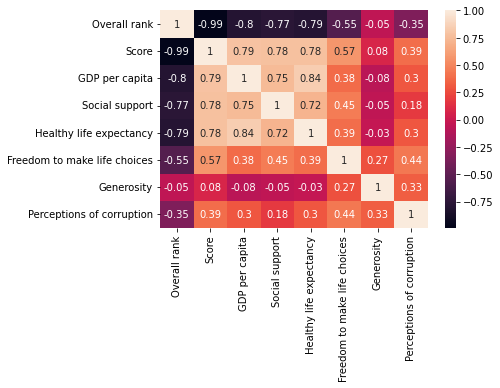

In [22]:
sns.heatmap(round(happiness.corr(),2), annot=True)


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'South Asia'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Middle East & North Africa'),
  Text(3, 0, 'Latin America & Caribbean'),
  Text(4, 0, 'East Asia & Pacific'),
  Text(5, 0, 'Sub-Saharan Africa'),
  Text(6, 0, 'North America')])

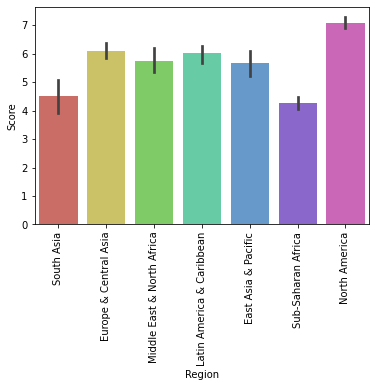

In [16]:
metada = pd.read_csv("/content/Metadata_2.csv")
metada = pd.DataFrame(metada)
metada.rename(columns={'TableName':'Country or region'},inplace=True)
metada
merged_df = metada.merge(happiness,on='Country or region')
merged_df
merged_df[['Score', 'Region']].groupby('Region').mean()
sns.barplot(x='Region',y='Score',data=merged_df, palette = 'hls')
plt.xticks(rotation = 90)
